 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Read whale_returns.csv
whale_returns_filepath = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_filepath, index_col=["Date"], infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

# Verify nulls are removed
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_filepath = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_filepath, index_col=["Date"], infer_datetime_format=True, parse_dates=True)

In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

# Verify nulls are removed
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_filepath = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_filepath, index_col=["Date"], infer_datetime_format=True, parse_dates=True)

In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype(float)

sp500_history_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns for S&P 500
sp500_history_df.sort_index(inplace=True)
sp500_returns_df = sp500_history_df.pct_change()

In [12]:
# Drop nulls
sp500_returns_df = sp500_returns_df.dropna()

In [13]:
# Rename 'Close' Column to be 'S&P 500'
sp500_returns_df = sp500_returns_df.rename(columns={"Close":"S&P 500"})
sp500_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis="columns", join="inner")
combined_returns_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

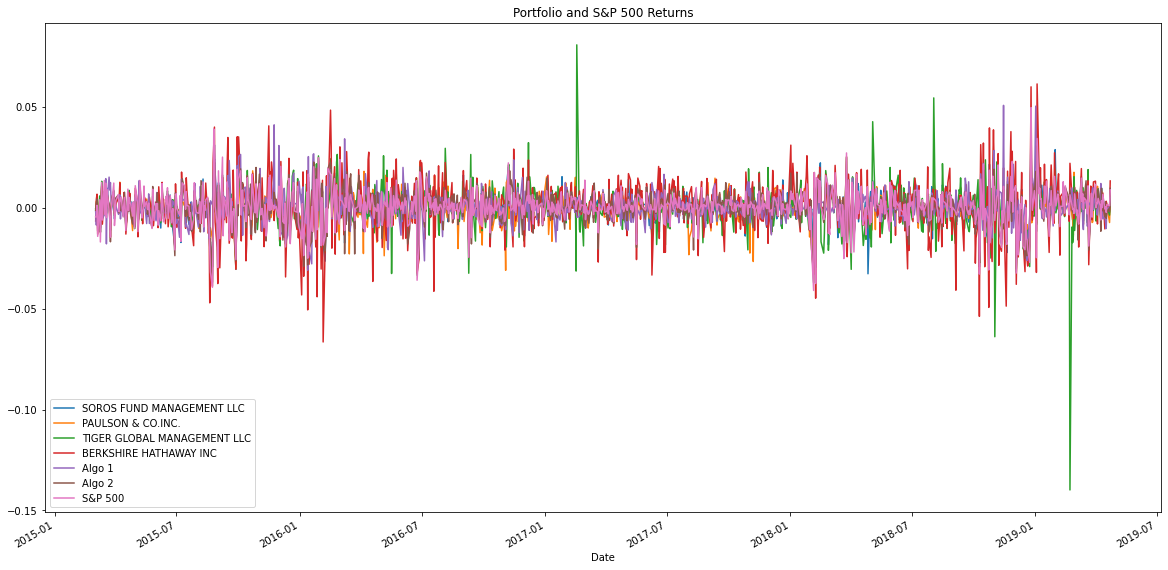

In [15]:
# Plot daily returns of all portfolios
combined_returns_df.plot(figsize=(20,10), title="Portfolio and S&P 500 Returns")

#### Calculate and Plot cumulative returns.

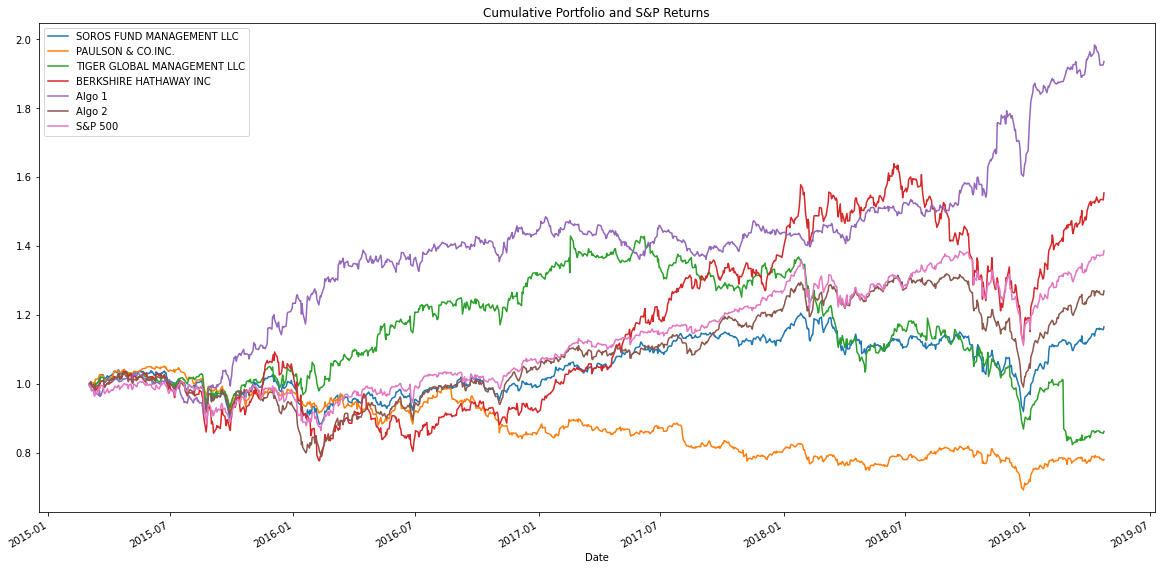

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Portfolio and S&P Returns")

**Q: Does any portfolio outperform the S&P 500?**

*Yes, Algo1 and Berkshire Hathaway Inc outperforms the S&P 500 towards mid-2019.*

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


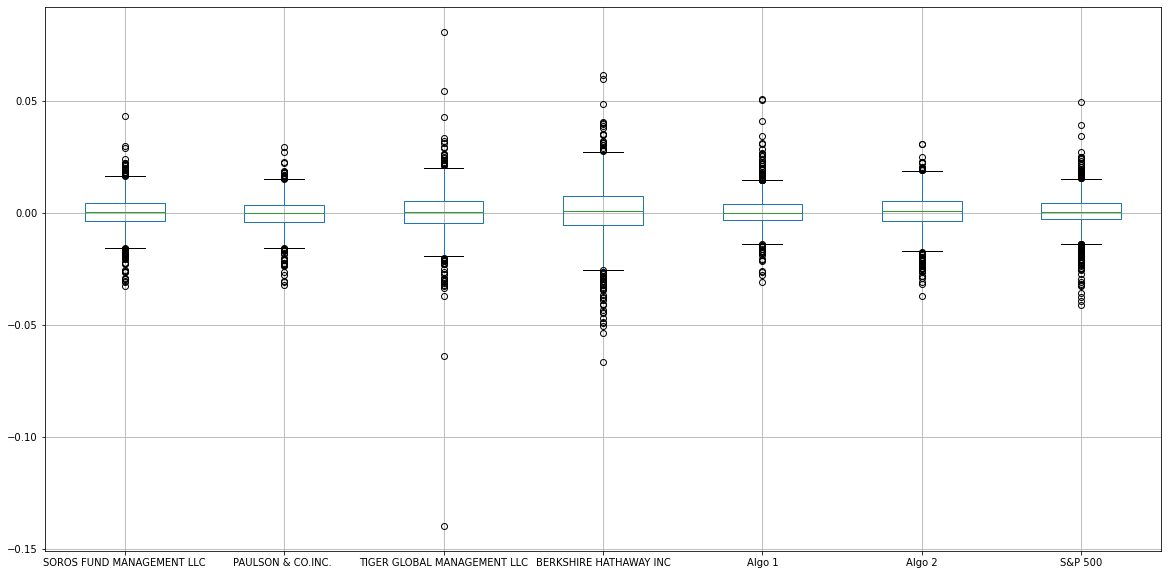

In [17]:
# Box plot to visually show risk
combined_returns_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
combined_std_df = combined_returns_df.std()

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate the daily standard deviation of S&P 500
sp500_std = combined_std_df["S&P 500"]
print(f"S&P 500 Standard Deviation: {sp500_std:.6f}")

# Determine which portfolios are riskier than the S&P 500
combined_std_df[combined_std_df > sp500_std]

S&P 500 Standard Deviation: 0.008554


TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

**Q: Which portfolios are riskier than the S&P 500?**

*Tiger Global Management LLC and Berkshire Hathaway Inc are riskier than the S&P 500 because it has higher standard deviation.*

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns_df.std() * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

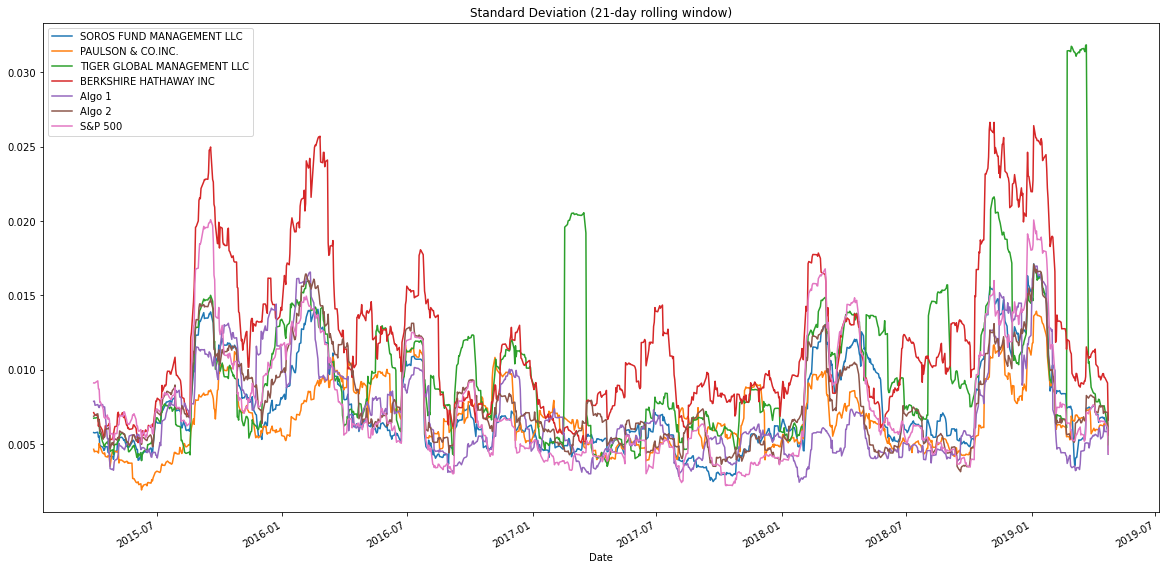

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21 = combined_returns_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_21.plot(figsize=(20,10), title="Standard Deviation (21-day rolling window)")

### Calculate and plot the correlation

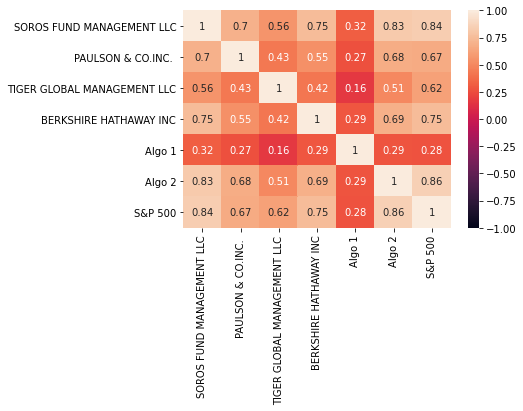

In [22]:
# Calculate the correlation
combined_correlation = combined_returns_df.corr(method="pearson")

# Display the correlation matrix
sns.heatmap(combined_correlation, vmin=-1, vmax=1, annot=True)

*Of all the portfolios, the Soros Fund Management LLC and Algo 2 portfolios have the highest correlation with the S&P 500 at 0.84 and 0.86, respectively.*

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

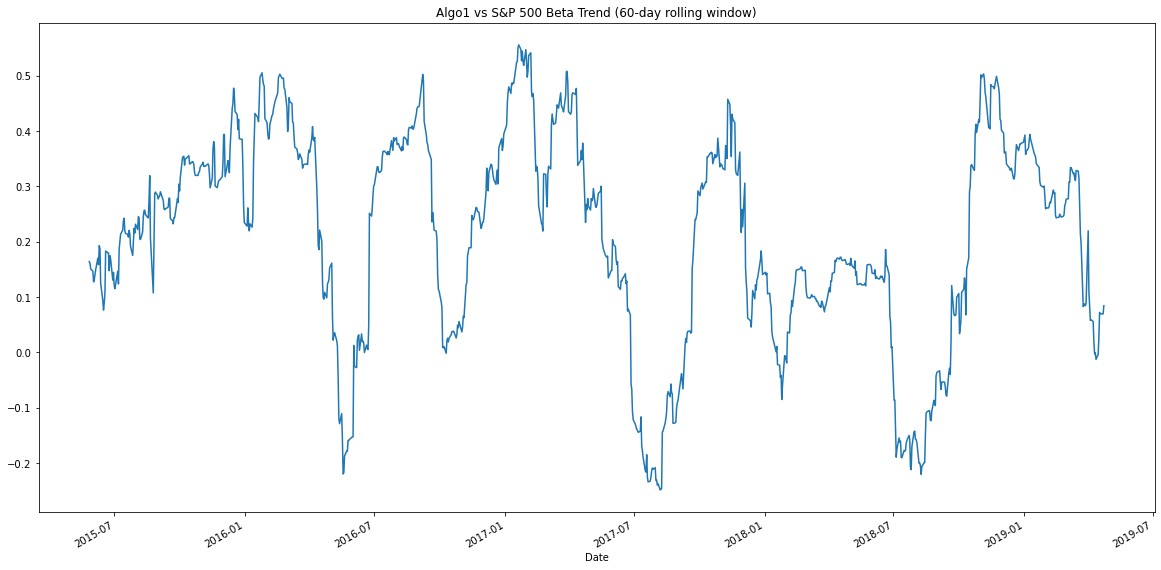

In [23]:
# Calculate covariance of a single portfolio
algo1_rolling60_cov = combined_returns_df["Algo 1"].rolling(window=60).cov(combined_returns_df["S&P 500"])

# Calculate variance of S&P 500
sp500_rolling60_var = combined_returns_df["S&P 500"].rolling(window=60).var()

# Computing beta
algo1_rolling60_beta = algo1_rolling60_cov / sp500_rolling60_var

# Plot beta trend
algo1_rolling60_beta.plot(figsize=(20,10), title="Algo1 vs S&P 500 Beta Trend (60-day rolling window)")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

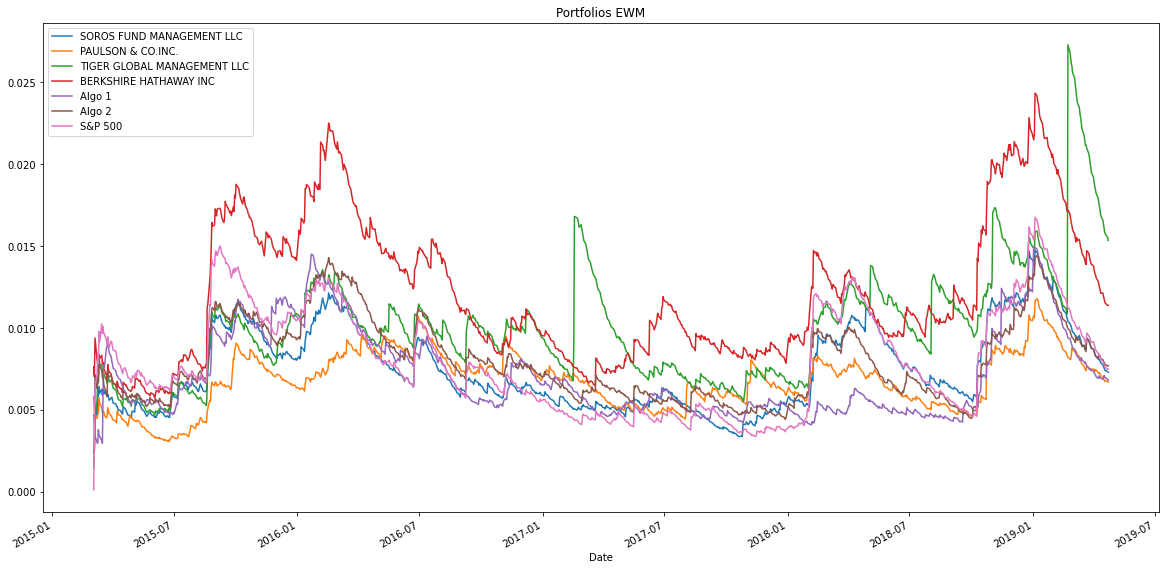

In [24]:
# Use `ewm` to calculate the rolling window
ewm_21 = combined_returns_df.ewm(halflife=21).std()

ewm_21.plot(figsize=(20,10), title="Portfolios EWM")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_returns_df.mean() * 252) - 0.0025) / annualized_std
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.336470
PAULSON & CO.INC.             -0.505994
TIGER GLOBAL MANAGEMENT LLC   -0.135516
BERKSHIRE HATHAWAY INC         0.609620
Algo 1                         1.357982
Algo 2                         0.482486
S&P 500                        0.629856
dtype: float64

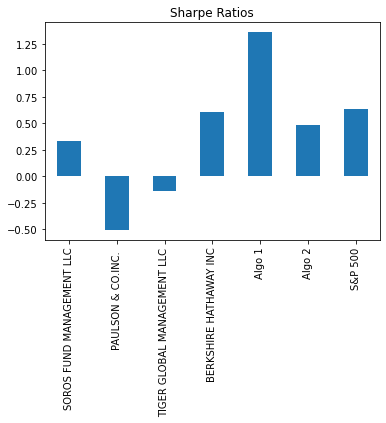

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

*The Algo1 strategy outperforms both the market (S&P 500) and the whales portfolios. The Algo2 strategy outperforms all of the whales portfolios except the Berkshire Hathaway Inc portfolio. It did not outperform the market (S&P 500).*

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

For this analysis, I chose the following stocks to include in my portfolio: **Google (GOOG)**, **Facebook (FB)** and **Microsoft (MSFT)**.

In [27]:
# Reading data from 1st stock (Google, GOOG)
goog_filepath = Path("Resources/GOOG.csv")
goog_df = pd.read_csv(goog_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
goog_df.head()

,Close
Date,
2015-03-02 16:00:00,569.78
2015-03-03 16:00:00,572.07
2015-03-04 16:00:00,571.80
2015-03-05 16:00:00,573.76
2015-03-06 16:00:00,566.13


In [28]:
# Reading data from 2nd stock (Facebook, FB)
fb_filepath = Path("Resources/FB.csv")
fb_df = pd.read_csv(fb_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
fb_df.head()

,Close
Date,
2015-03-02 16:00:00,79.75
2015-03-03 16:00:00,79.60
2015-03-04 16:00:00,80.90
2015-03-05 16:00:00,81.21
2015-03-06 16:00:00,80.01


In [29]:
# Reading data from 3rd stock (Microsoft, MSFT)
msft_filepath = Path("Resources/MSFT.csv")
msft_df = pd.read_csv(msft_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
msft_df.head()

,Close
Date,
2015-03-02 16:00:00,43.88
2015-03-03 16:00:00,43.28
2015-03-04 16:00:00,43.06
2015-03-05 16:00:00,43.11
2015-03-06 16:00:00,42.36


In [30]:
# Reading data from S&P 500
sp60tsx_filepath = Path("Resources/SP60TSX.csv")
sp60tsx_df = pd.read_csv(sp60tsx_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Reset Date index
sp60tsx_df = sp60tsx_df.reset_index()
sp60tsx_df = sp60tsx_df.set_index(pd.to_datetime(sp60tsx_df['Date']).dt.date)
sp60tsx_df = sp60tsx_df.drop(columns=["Date"])
sp60tsx_df.columns = ["S&P 60 TSX"]

sp60tsx_df.head()

,S&P 60 TSX
Date,
2015-03-02,892.57
2015-03-03,883.53
2015-03-04,880.39
2015-03-05,882.78
2015-03-06,874.51


In [31]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([goog_df, fb_df, msft_df], axis="columns", join="inner")
combined_stocks_df.columns = ["GOOG", "FB", "MSFT"]
combined_stocks_df.sort_index(inplace=True)
combined_stocks_df.head()

,GOOG,FB,MSFT
Date,,,
2015-03-02 16:00:00,569.78,79.75,43.88
2015-03-03 16:00:00,572.07,79.60,43.28
2015-03-04 16:00:00,571.80,80.90,43.06
2015-03-05 16:00:00,573.76,81.21,43.11
2015-03-06 16:00:00,566.13,80.01,42.36


In [32]:
# Reset Date index
combined_stocks_df = combined_stocks_df.reset_index()
combined_stocks_df = combined_stocks_df.set_index(pd.to_datetime(combined_stocks_df['Date']).dt.date)
combined_stocks_df = combined_stocks_df.drop(columns=["Date"])
combined_stocks_df.head()

,GOOG,FB,MSFT
Date,,,
2015-03-02,569.78,79.75,43.88
2015-03-03,572.07,79.60,43.28
2015-03-04,571.80,80.90,43.06
2015-03-05,573.76,81.21,43.11
2015-03-06,566.13,80.01,42.36


In [33]:
# Calculate daily returns
stocks_daily_returns = combined_stocks_df.pct_change()

# Drop NAs
stocks_daily_returns = stocks_daily_returns.dropna()

# Display sample data
stocks_daily_returns.sample(10)

,GOOG,FB,MSFT
Date,,,
2016-12-14,0.001218,-0.000831,-0.004763
2016-11-07,0.026902,0.011594,0.029126
2018-08-16,-0.006497,-0.026904,-0.000186
2018-07-30,-0.015147,-0.021899,-0.021452
2018-10-01,0.001542,-0.012283,0.010842
2015-07-13,0.030974,0.024446,0.020847
2018-11-30,0.005633,0.013917,0.006353
2017-07-12,0.014773,0.023379,0.016574
2018-01-31,0.005371,-0.001229,0.024477


In [34]:
sp60tsx_df.sort_index(inplace=True)
sp60tsx_daily_returns = sp60tsx_df.pct_change().dropna()
sp60tsx_daily_returns.sample(10)

,S&P 60 TSX
Date,
2019-03-06,0.001481
2017-09-07,-0.002900
2017-07-12,-0.000873
2016-10-03,-0.002516
2015-10-27,-0.004520
2017-02-22,-0.005770
2017-03-30,-0.005481
2018-05-31,0.001454
2017-04-06,0.003841


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = stocks_daily_returns.dot(weights)
my_portfolio_returns.name = "My Portfolio"

# Display sample data
my_portfolio_returns.sample(10)

Date
2018-05-09    0.020024
2019-02-25    0.007192
2015-04-17   -0.016552
2017-04-18   -0.001682
2017-10-16    0.002966
2016-08-11    0.001734
2016-02-12    0.005414
2017-02-15   -0.001825
2016-02-10    0.010752
2018-12-14   -0.018815
Name: My Portfolio, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat([combined_returns_df, my_portfolio_returns, sp60tsx_daily_returns], axis="columns", join="inner")
all_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio,S&P 60 TSX
Date,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.003845,-0.010128
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.003592,-0.003554
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.002807,0.002715
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.015157,-0.009368
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.002164,-0.006289


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns = all_portfolio_returns.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
all_annualized_std = all_portfolio_returns.std() * np.sqrt(252)
all_annualized_std

SOROS FUND MANAGEMENT LLC      0.124516
PAULSON & CO.INC.              0.111049
TIGER GLOBAL MANAGEMENT LLC    0.173053
BERKSHIRE HATHAWAY INC         0.204030
Algo 1                         0.120783
Algo 2                         0.132426
S&P 500                        0.134719
My Portfolio                   0.216034
S&P 60 TSX                     0.115518
dtype: float64

### Calculate and plot rolling `std` with 21-day window

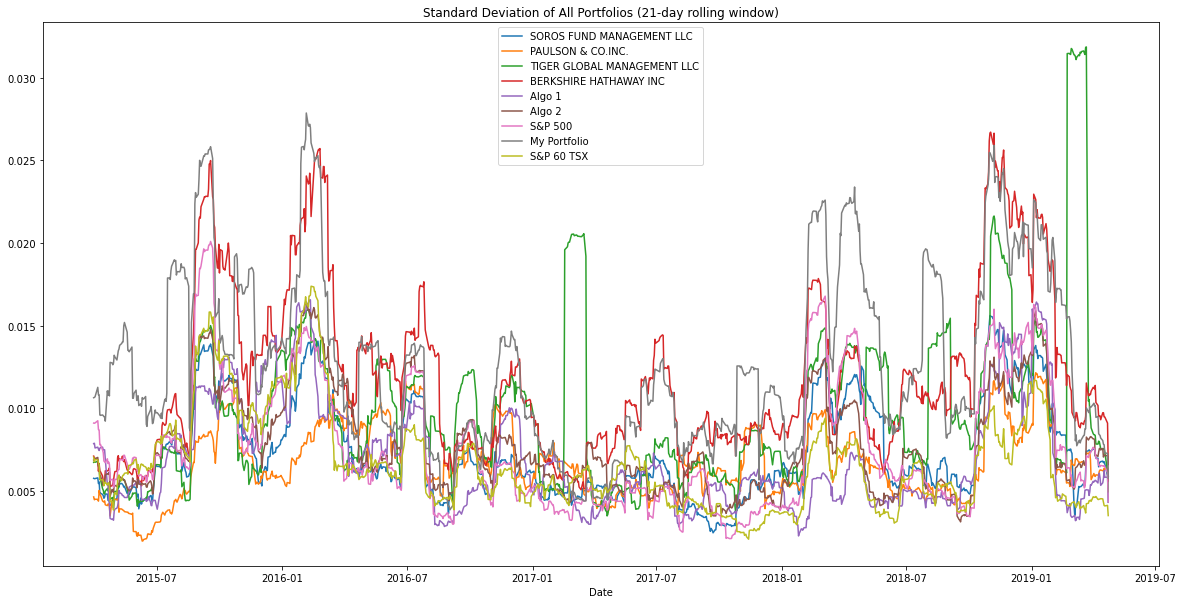

In [39]:
# Calculate rolling standard deviation
all_rolling21_std = all_portfolio_returns.rolling(window=21).std()

# Plot rolling standard deviation
all_rolling21_std.plot(figsize=(20,10), title="Standard Deviation of All Portfolios (21-day rolling window)")

### Calculate and plot the correlation

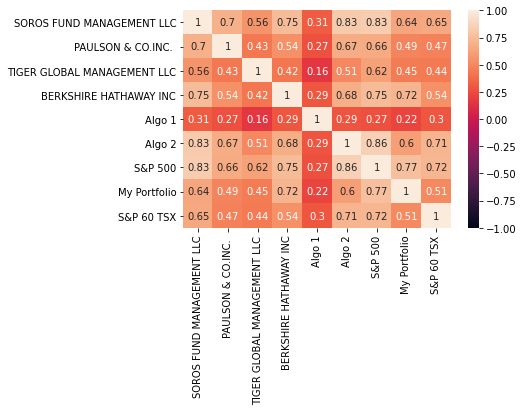

In [40]:
# Calculate and plot the correlation
all_returns_correlation = all_portfolio_returns.corr(method="pearson")

sns.heatmap(all_returns_correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

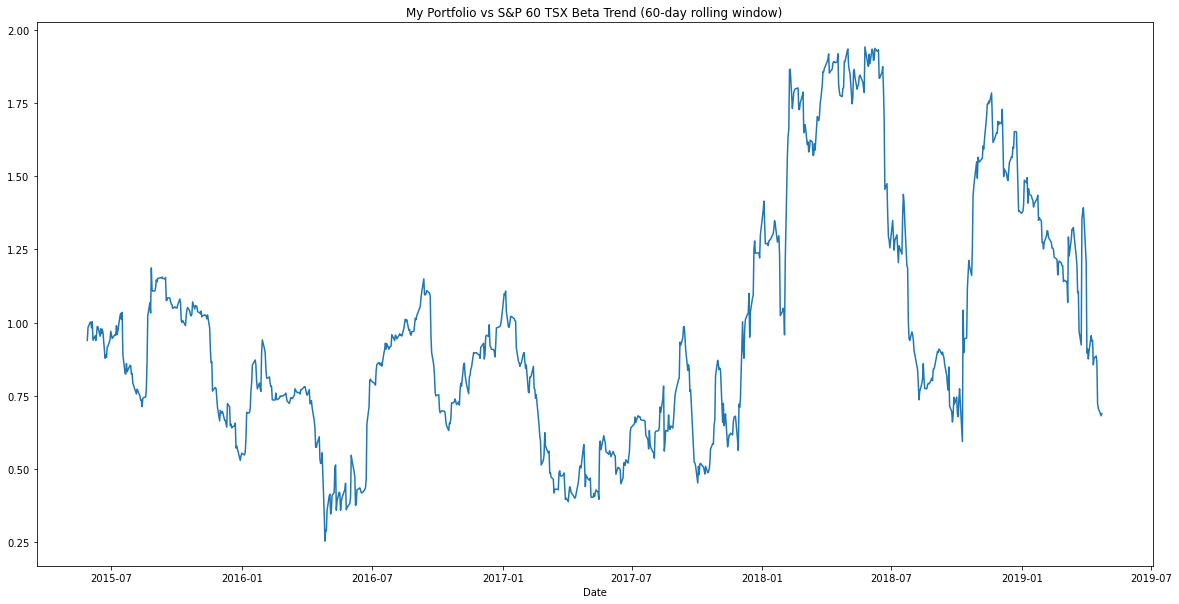

In [41]:
# Calculate covariance of a single portfolio
my_portfolio_rolling60_cov = all_portfolio_returns["My Portfolio"].rolling(window=60).cov(all_portfolio_returns["S&P 60 TSX"])

# Calculate variance of S&P 500
sp60tsx_rolling60_var = all_portfolio_returns["S&P 60 TSX"].rolling(window=60).var()

# Computing beta
my_portfolio_rolling60_beta = my_portfolio_rolling60_cov / sp60tsx_rolling60_var

# Plot beta trend
my_portfolio_rolling60_beta.plot(figsize=(20,10), title="My Portfolio vs S&P 60 TSX Beta Trend (60-day rolling window)")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualized Sharpe Ratios
all_annualized_std = all_portfolio_returns.std() * np.sqrt(252)
all_sharpe_ratios = ((all_portfolio_returns.mean() * 252) - 0.0025) / all_annualized_std
all_sharpe_ratios.sort_values(inplace=True)
all_sharpe_ratios

PAULSON & CO.INC.             -0.590133
TIGER GLOBAL MANAGEMENT LLC   -0.161291
S&P 60 TSX                     0.234641
SOROS FUND MANAGEMENT LLC      0.259287
Algo 2                         0.393821
BERKSHIRE HATHAWAY INC         0.453419
S&P 500                        0.499109
My Portfolio                   1.008452
Algo 1                         1.461161
dtype: float64

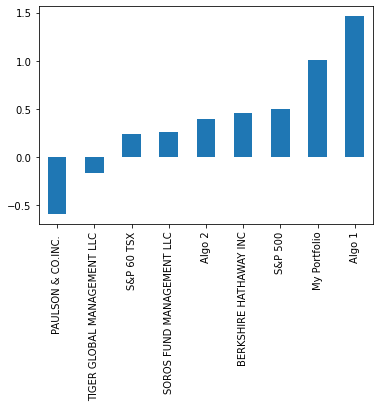

In [43]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar")

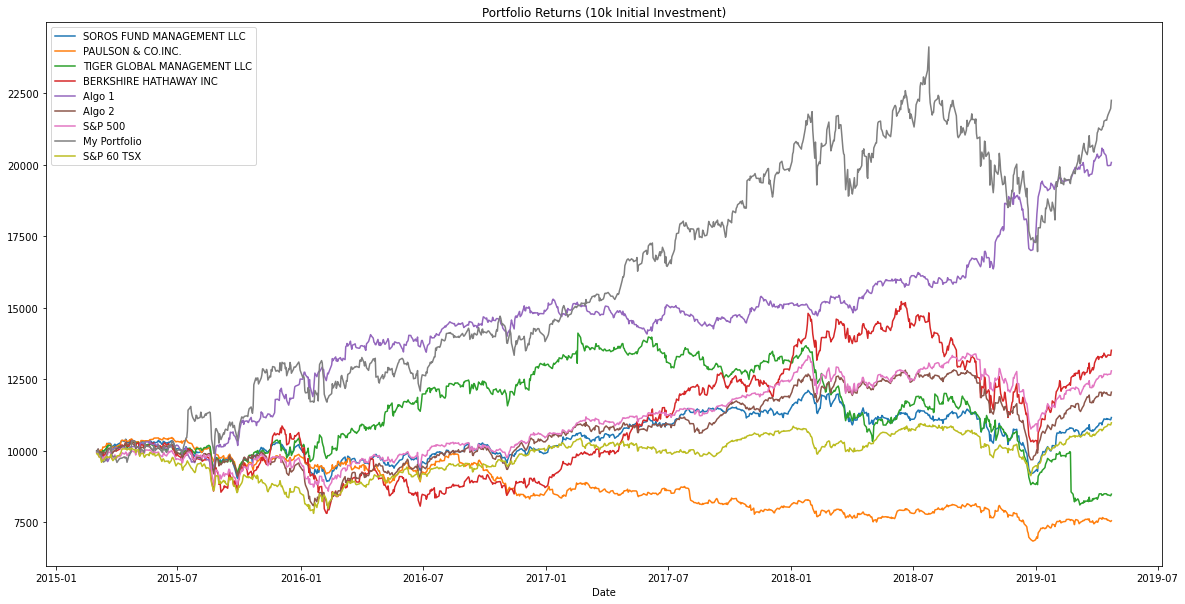

In [44]:
initial_investment = 10000
cumulative_returns = (1 + all_portfolio_returns).cumprod()
(initial_investment * cumulative_returns).plot(figsize=(20,10), title="Portfolio Returns (10k Initial Investment)")

### How does your portfolio do?

- My portfolio's Sharpe Ratio at 1.008 is higher than all other portfolios and markets except Algo 1 strategy (1.461). This is encouraging from a rewards standpoint.
- My portfolio quite closely follows the standard deviation pattern of the Berkshire Hathaway Inc portfolio starting in late 2018 to early 2019.
- My portfolio is most correlated with the Berkshire Hathaway Inc portfolio (0.72) and the S&P 500 index (0.77); however it least correlated with the Algo1 strategy (0.22). It is not surprising that it somewhat correlates with the S&P 500 index; all the stocks in my portfolio are in that index.
- In the first half of 2018, my portfolio had a high beta index, hovering between 1.75 and 2. This indicates higher volatility compared to the market (S&P 60 TSX). That value dropped to below 1 (less volatility relative to the market) in the second half of 2018, rising again in early 2019 and then steadily declining into mid-2019.
- If I were to initially invest $10,000 in my portfolio in 2015, I would have more than doubled my investment in 2019. My portfolio outperformed all other portfolios and markets.